In [218]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Predictive Maintenance Dataset

In [100]:
# Predictive maintenance dataset
predictive_maintenance = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv')

# Drops columns with strings
predictive_maintenance = predictive_maintenance.drop(columns = ['UDI', 'Product ID'])

# One hot encoding categorical features
encoder = OneHotEncoder().fit(predictive_maintenance[['Type']])
encoder.categories_

transformed = encoder.transform(predictive_maintenance[['Type']] ).toarray() 
transformed

for index, category in enumerate( np.concatenate(encoder.categories_) ):
    predictive_maintenance[category] = transformed[:,index] 

predictive_maintenance = predictive_maintenance.drop(columns = ['Type'])

cols = predictive_maintenance.columns.tolist()
cols = cols[-3:] + cols[:-3]
predictive_maintenance = predictive_maintenance[cols]

predictive_maintenance

,H,L,M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0.0,0.0,1.0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0.0,1.0,0.0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,0.0,1.0,0.0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,0.0,1.0,0.0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,0.0,1.0,0.0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,1.0,0.0,0.0,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,0.0,0.0,1.0,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,1.0,0.0,0.0,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [101]:
# Stores all columns except Machine Failure in X and Machine Failure in Y
X_p = predictive_maintenance.drop(['Machine failure'], axis = 1)
Y_p = predictive_maintenance['Machine failure']

# Gets 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_p, Y_p, train_size = 5000, random_state = 1)

In [54]:
# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

In [56]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4830    0]
 [   5  165]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4830
           1       1.00      0.97      0.99       170

    accuracy                           1.00      5000
   macro avg       1.00      0.99      0.99      5000
weighted avg       1.00      1.00      1.00      5000



In [59]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))

Text(0, 0.5, 'Mean Error')

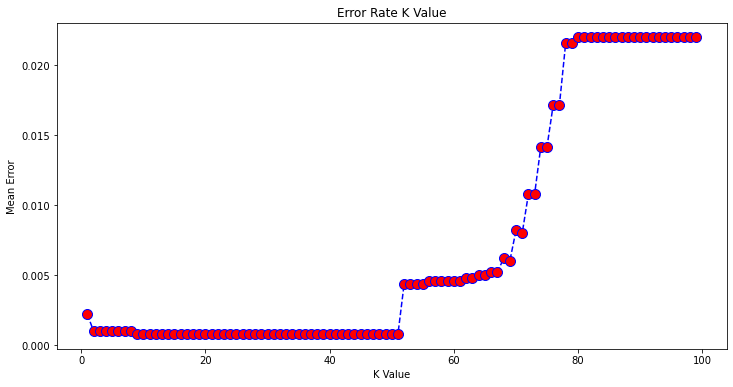

In [61]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [63]:
# create classification
knn = KNeighborsClassifier(metric = 'euclidean')

# create parameters
grid_params = {
    'n_neighbors':[1,5,9,13,17,21,25,29,33,37,41,45,49,53,61,65,69,73,77,81,85,89,93,97,101,105],
    'weights':['uniform', 'distance'],
    'n_jobs': [-1]
}

gs = GridSearchCV(knn, param_grid = grid_params, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

gs_results = gs.fit(X_train, Y_train)

In [64]:
gs_results.cv_results_

{'mean_fit_time': array([0.02638192, 0.02361269, 0.0232038 , 0.02235613, 0.02207208,
        0.03070159, 0.02713857, 0.02963886, 0.03165836, 0.02468023,
        0.02250104, 0.02263227, 0.0223475 , 0.03196659, 0.03019581,
        0.02561259, 0.0226768 , 0.02557769, 0.0232717 , 0.0279613 ,
        0.02401481, 0.02716703, 0.0244853 , 0.02187629, 0.3894906 ,
        0.19029202, 0.38025846, 0.02564554, 0.02947931, 0.11400504,
        0.04603395, 0.02241373, 0.18585896, 0.02915101, 0.02158084,
        0.02819042, 0.0379108 , 0.03967376, 0.03205032, 0.02535877,
        0.02931499, 0.03319926, 0.20078154, 0.05818815, 0.0234179 ,
        0.03097043, 0.03486776, 0.03028884, 0.0292902 , 0.03395762,
        0.04322033, 0.03021164]),
 'std_fit_time': array([4.36025213e-03, 1.51130200e-03, 1.13419696e-03, 3.65926948e-04,
        4.53904219e-04, 1.05371270e-02, 8.04587223e-03, 4.20158149e-03,
        6.49990642e-03, 2.27087156e-03, 5.51825462e-04, 1.22057542e-03,
        5.27813426e-04, 1.30340519e-0

In [65]:
gs_results.cv_results_['rank_test_accuracy']

array([29, 29,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, 35,  1, 37,  1, 37,  1, 40,  1, 41,  1, 42,  1, 43, 25,
       43, 26, 43, 27, 43, 27, 43, 31, 43, 32, 49, 33, 50, 34, 51, 36, 51,
       39], dtype=int32)

In [66]:
# finds best model for accuracy
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_accuracy']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [67]:
# finds best model for roc auc
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_roc_auc_ovr']) ]

{'n_jobs': -1, 'n_neighbors': 81, 'weights': 'uniform'}

In [68]:
# finds best model for f1
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_f1_micro']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [69]:
# best accuracy model
acc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

# best roc auc model
roc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 81, weights = 'uniform')

# best f1 model
f1_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

In [70]:
# models the data
acc_model.fit(X_train, Y_train)
roc_model.fit(X_train, Y_train)
f1_model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs='-1')

In [71]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_p, Y_p, train_size = 5000, random_state = 2)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4836    0]
 [   4  160]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4836
           1       1.00      0.98      0.99       164

    accuracy                           1.00      5000
   macro avg       1.00      0.99      0.99      5000
weighted avg       1.00      1.00      1.00      5000



In [72]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))

Text(0, 0.5, 'Mean Error')

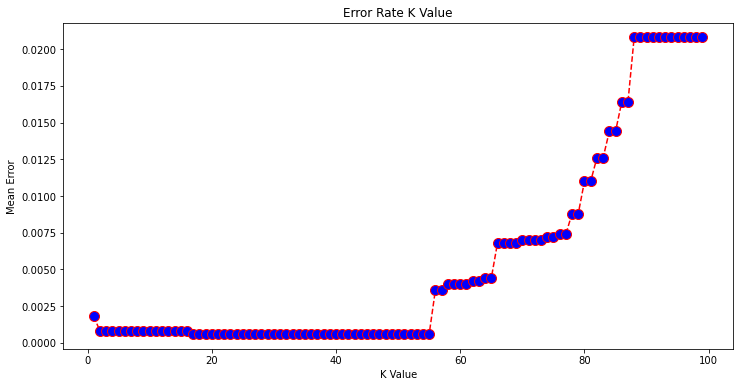

In [73]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [74]:
# Gets 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_p, Y_p, train_size = 5000, random_state = 3)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4837    0]
 [   4  159]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4837
           1       1.00      0.98      0.99       163

    accuracy                           1.00      5000
   macro avg       1.00      0.99      0.99      5000
weighted avg       1.00      1.00      1.00      5000



In [75]:
error = []

# Calculates mean of error for all predicted values in the range of 1 and 500
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))

Text(0, 0.5, 'Mean Error')

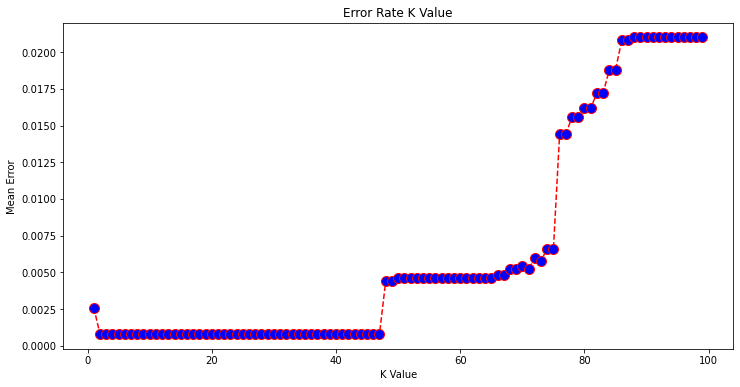

In [76]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [77]:
# create classification
knn = KNeighborsClassifier(metric = 'euclidean')

# create parameters
grid_params = {
    'n_neighbors':[1,5,9,13,17,21,25,29,33,37,41,45,49,53,61,65,69,73,77,81,85,89,93,97,101,105],
    'weights':['uniform', 'distance'],
    'n_jobs': [-1]
}

gs = GridSearchCV(knn, param_grid = grid_params, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

gs_results = gs.fit(X_train, Y_train)

In [78]:
gs_results.cv_results_

{'mean_fit_time': array([0.02214065, 0.03193073, 0.02821693, 0.02184577, 0.02183805,
        0.02666373, 0.02395277, 0.02489719, 0.02731662, 0.02642007,
        0.02254663, 0.02235003, 0.11844745, 0.04585137, 0.03574624,
        0.11373463, 0.15232234, 0.02272558, 0.14548526, 0.06993613,
        0.03670521, 0.0280983 , 0.02750735, 0.02949162, 0.0305027 ,
        0.02821617, 0.02814975, 0.02192383, 0.02872005, 0.02427673,
        0.03354201, 0.02774434, 0.02850599, 0.13925118, 0.03128986,
        0.02162471, 0.03221035, 0.02725039, 0.03430734, 0.03544312,
        0.02778397, 0.03480902, 0.03350854, 0.04234886, 0.03569756,
        0.03680139, 0.03805795, 0.0248383 , 0.02284327, 0.02734742,
        0.04756699, 0.02882462]),
 'std_fit_time': array([6.38167713e-04, 8.78796812e-03, 5.25917069e-03, 4.00728796e-05,
        1.86452756e-04, 8.80098200e-03, 4.03845487e-03, 2.70235029e-03,
        6.83720349e-03, 6.26284859e-03, 8.42208501e-04, 4.06562010e-04,
        1.89327262e-01, 2.11435772e-0

In [79]:
gs_results.cv_results_['rank_test_accuracy']

array([28, 28,  8,  8,  8,  8,  8,  8,  8,  8,  1,  8,  1,  1,  1,  1, 27,
        1, 31,  1, 34,  8, 37,  8, 37,  8, 40,  8, 41,  8, 42, 22, 43, 23,
       44, 23, 44, 25, 46, 25, 47, 30, 47, 32, 49, 33, 49, 35, 51, 35, 52,
       39], dtype=int32)

In [80]:
# finds best model for accuracy
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_accuracy']) ]

{'n_jobs': -1, 'n_neighbors': 21, 'weights': 'uniform'}

In [81]:
# finds best model for roc auc
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_roc_auc_ovr']) ]

{'n_jobs': -1, 'n_neighbors': 13, 'weights': 'uniform'}

In [82]:
# finds best model for f1
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_f1_micro']) ]

{'n_jobs': -1, 'n_neighbors': 21, 'weights': 'uniform'}

In [83]:
# best accuracy model
acc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 21, weights = 'uniform')

# best roc auc model
roc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 13, weights = 'uniform')

# best f1 model
f1_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 21, weights = 'uniform')

In [84]:
# models the data
acc_model.fit(X_train, Y_train)
roc_model.fit(X_train, Y_train)
f1_model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs='-1', n_neighbors=21)

In [85]:
# Gets 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_p, Y_p, train_size = 5000, random_state = 4)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4830    0]
 [   6  164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4830
           1       1.00      0.96      0.98       170

    accuracy                           1.00      5000
   macro avg       1.00      0.98      0.99      5000
weighted avg       1.00      1.00      1.00      5000



In [86]:
# create classification
knn = KNeighborsClassifier(metric = 'euclidean')

# create parameters
grid_params = {
    'n_neighbors':[1,5,9,13,17,21,25,29,33,37,41,45,49,53,61,65,69,73,77,81,85,89,93,97,101,105],
    'weights':['uniform', 'distance'],
    'n_jobs': [-1]
}

gs = GridSearchCV(knn, param_grid = grid_params, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

gs_results = gs.fit(X_train, Y_train)

In [87]:
gs_results.cv_results_

{'mean_fit_time': array([1.15768166, 1.4553977 , 1.47659593, 1.05712624, 1.09756651,
        1.27902207, 1.21563087, 1.32061019, 1.27904787, 1.55711422,
        1.14264178, 0.9778028 , 1.07925429, 1.51762161, 1.51788855,
        0.93795524, 1.059237  , 1.07639422, 1.29928803, 1.13588758,
        1.33548684, 1.45716724, 1.01869192, 1.19821663, 1.57776327,
        1.45599041, 1.13730202, 1.43816285, 1.1564507 , 1.11975317,
        1.3972127 , 1.09729209, 1.36081214, 1.5577446 , 1.26117802,
        0.2696939 , 0.0220736 , 0.0444725 , 0.02535777, 0.02323484,
        0.02248421, 0.02822742, 0.02352653, 0.02209654, 0.02279067,
        0.02200732, 0.17314959, 0.03537755, 0.03339071, 0.0342576 ,
        0.12462144, 0.03060789]),
 'std_fit_time': array([2.37697235e-01, 3.06557052e-01, 3.58664111e-01, 1.50466993e-01,
        1.99615986e-01, 3.55532311e-01, 3.10568168e-01, 3.21050372e-01,
        1.73351162e-01, 3.92662971e-01, 3.56875798e-01, 1.59774895e-01,
        3.92077573e-01, 5.34984876e-0

In [88]:
gs_results.cv_results_['rank_test_accuracy']

array([27, 27,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 30,
        1, 30,  1, 34,  1, 36,  1, 38,  1, 39,  1, 41, 21, 42, 21, 43, 23,
       44, 24, 45, 24, 46, 24, 46, 29, 48, 32, 48, 33, 48, 34, 51, 36, 51,
       40], dtype=int32)

In [89]:
# finds best model for accuracy
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_accuracy']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [90]:
# finds best model for roc auc
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_roc_auc_ovr']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [91]:
# finds best model for f1
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_f1_micro']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [92]:
# best accuracy model
acc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

# best roc auc model
roc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

# best f1 model
f1_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

In [93]:
# models the data
acc_model.fit(X_train, Y_train)
roc_model.fit(X_train, Y_train)
f1_model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs='-1')

In [94]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))

Text(0, 0.5, 'Mean Error')

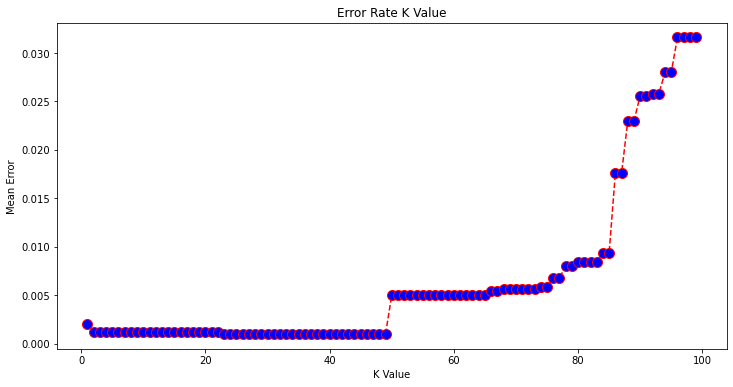

In [95]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [102]:
# Gets 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_p, Y_p, train_size = 5000, random_state = 5)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4815    0]
 [   4  181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4815
           1       1.00      0.98      0.99       185

    accuracy                           1.00      5000
   macro avg       1.00      0.99      0.99      5000
weighted avg       1.00      1.00      1.00      5000



In [103]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))

Text(0, 0.5, 'Mean Error')

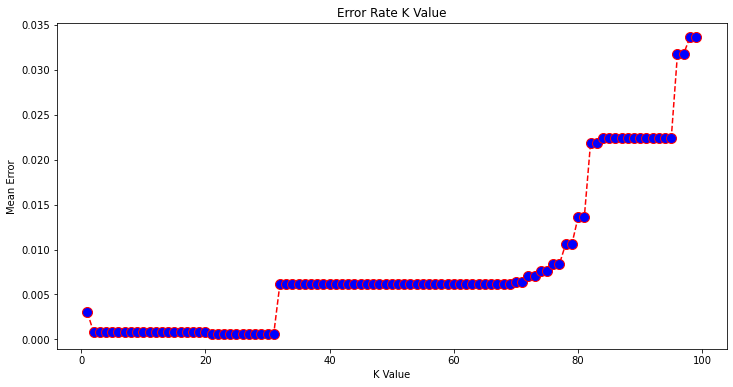

In [104]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [105]:
# create classification
knn = KNeighborsClassifier(metric = 'euclidean')

# create parameters
grid_params = {
    'n_neighbors':[1,5,9,13,17,21,25,29,33,37,41,45,49,53,61,65,69,73,77,81,85,89,93,97,101,105],
    'weights':['uniform', 'distance'],
    'n_jobs': [-1]
}

gs = GridSearchCV(knn, param_grid = grid_params, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

gs_results = gs.fit(X_train, Y_train)

In [106]:
gs_results.cv_results_

{'mean_fit_time': array([0.04005303, 0.03565497, 0.03765411, 0.03272381, 0.04210458,
        0.03695154, 0.02190795, 0.04274917, 0.03714652, 0.08136616,
        0.02267699, 0.03271079, 0.02884917, 0.03305497, 0.14872766,
        0.02591524, 0.03132391, 0.02385135, 0.02748132, 0.04856892,
        0.02336316, 0.05000744, 0.03248401, 0.11578188, 0.03799386,
        0.0280201 , 0.02282314, 0.02929921, 0.03913817, 0.02318339,
        0.02977242, 0.02732191, 0.05332608, 0.02812161, 0.0223815 ,
        0.03916893, 0.03098307, 0.03658862, 0.03943458, 0.03402438,
        0.16064339, 0.0241447 , 0.03333302, 0.02826023, 0.02853003,
        0.02153735, 0.03420625, 0.02844906, 0.03617539, 0.03493752,
        0.02168164, 0.03857098]),
 'std_fit_time': array([1.55132193e-02, 1.59668603e-02, 1.94757592e-02, 1.17790907e-02,
        3.61975634e-02, 1.78689370e-02, 4.71986335e-04, 2.78955425e-02,
        1.22149822e-02, 1.18552189e-01, 1.52490748e-03, 1.28974452e-02,
        1.03350933e-02, 1.36825693e-0

In [107]:
gs_results.cv_results_['rank_test_accuracy']

array([20, 20,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 25,  1, 28,  1, 30,
        1, 30,  1, 30,  1, 33,  1, 33, 17, 36, 17, 41, 19, 42, 20, 43, 23,
       44, 23, 45, 25, 46, 27, 47, 28, 47, 33, 47, 37, 47, 38, 47, 39, 47,
       40], dtype=int32)

In [108]:
# finds best model for accuracy
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_accuracy']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [109]:
# finds best model for roc auc
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_roc_auc_ovr']) ]

{'n_jobs': -1, 'n_neighbors': 49, 'weights': 'uniform'}

In [110]:
# finds best model for f1
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_f1_micro']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [111]:
# best accuracy model
acc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

# best roc auc model
roc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 49, weights = 'uniform')

# best f1 model
f1_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

In [112]:
# models the data
acc_model.fit(X_train, Y_train)
roc_model.fit(X_train, Y_train)
f1_model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs='-1')

## Nursery Dataset

In [219]:
# loads the dataset
nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')

# One hot encoding categorical features
encoder = OneHotEncoder().fit(nursery[['usual', 'proper', 'complete', '1', 'convenient', 'convenient.1', 'nonprob', 'recommended', 'recommend']])
encoder.categories_

transformed = encoder.transform(nursery[['usual', 'proper', 'complete', '1', 'convenient', 'convenient.1', 'nonprob', 'recommended', 'recommend']] ).toarray() 
transformed

for index, category in enumerate( np.concatenate(encoder.categories_) ):
    nursery[category] = transformed[:,index]

# drops string
nursery = nursery.drop(columns = ['convenient.1'])
nursery

,usual,proper,complete,1,convenient,nonprob,recommended,recommend,great_pret,pretentious,...,3,more,less_conv,inconv,problematic,slightly_prob,not_recom,priority,spec_prior,very_recom
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
12955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
12956,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
12957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [220]:
# Stores column of 'recommended' in Y and everything else in X
X_n = nursery.drop(['recommended'], axis=1)
Y_n = nursery['recommended']

# Gets 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y_n, train_size = 5000, random_state = 1)

In [115]:
# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

In [16]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4234 1096]
 [1338 1291]]
              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78      5330
         1.0       0.54      0.49      0.51      2629

    accuracy                           0.69      7959
   macro avg       0.65      0.64      0.65      7959
weighted avg       0.69      0.69      0.69      7959



In [17]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))

Text(0, 0.5, 'Mean Error')

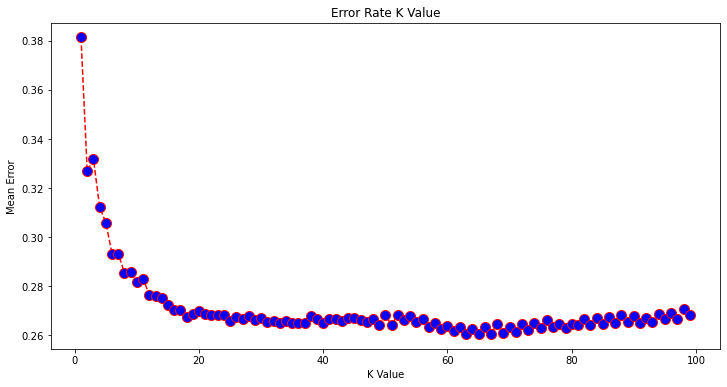

In [22]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [4]:
# create classification
knn = KNeighborsClassifier(metric = 'euclidean')

# create parameters
grid_params = {
    'n_neighbors':[1,5,9,13,17,21,25,29,33,37,41,45,49,53,61,65,69,73,77,81,85,89,93,97,101,105],
    'weights':['uniform', 'distance'],
    'n_jobs': [-1]
}

gs = GridSearchCV(knn, param_grid = grid_params, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

gs_results = gs.fit(X_train, Y_train)

In [5]:
gs_results.cv_results_

{'mean_fit_time': array([0.29847927, 0.20159178, 0.29932404, 0.24186201, 0.37969561,
        0.35929742, 0.16105399, 0.35847898, 0.19884529, 0.15953593,
        0.19853559, 0.17806611, 0.12103229, 0.12243786, 0.00462561,
        0.00417423, 0.00419068, 0.00388069, 0.00454955, 0.00406928,
        0.00582705, 0.00432911, 0.00402484, 0.00410447, 0.00407352,
        0.00402775, 0.00461731, 0.00426607, 0.00377254, 0.00394812,
        0.02375712, 0.02265968, 0.00409565, 0.00383029, 0.00461745,
        0.00423765, 0.00405154, 0.00392876, 0.00410419, 0.00385861,
        0.0039361 , 0.0039382 , 0.00400338, 0.00360308, 0.00387516,
        0.00386162, 0.00404334, 0.00385213, 0.00391378, 0.0041173 ,
        0.00411716, 0.00434828]),
 'std_fit_time': array([1.21820474e-01, 1.25347051e-01, 1.54213718e-01, 7.94660547e-02,
        4.14815807e-01, 3.41254404e-01, 1.00739372e-01, 1.49571881e-01,
        2.69037365e-04, 4.78380996e-02, 6.32962060e-02, 7.40885798e-02,
        9.50740073e-02, 2.36375098e-0

In [6]:
gs_results.cv_results_['rank_test_accuracy']

array([51, 51, 22, 26, 19, 28,  8, 27, 10, 34, 12, 34,  4, 29,  6, 31,  3,
       32,  1, 33,  2, 30,  5, 36,  9, 38,  6, 37, 11, 39, 13, 40, 14, 41,
       17, 42, 15, 43, 16, 45, 18, 44, 20, 47, 25, 46, 24, 48, 21, 49, 23,
       50], dtype=int32)

In [7]:
# finds best model for accuracy
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_accuracy']) ]

{'n_jobs': -1, 'n_neighbors': 37, 'weights': 'uniform'}

In [8]:
# finds best model for roc auc
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_roc_auc_ovr']) ]

{'n_jobs': -1, 'n_neighbors': 37, 'weights': 'uniform'}

In [9]:
# finds best model for f1
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_f1_micro']) ]

{'n_jobs': -1, 'n_neighbors': 37, 'weights': 'uniform'}

In [10]:
# best accuracy model
acc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 53, weights = 'uniform')

# best roc auc model
roc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 77, weights = 'uniform')

# best f1 model
f1_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 53, weights = 'uniform')

In [11]:
# models the data
acc_model.fit(X_train, Y_train)
roc_model.fit(X_train, Y_train)
f1_model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs='-1', n_neighbors=53)

In [24]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y_n, train_size = 5000, random_state = 2)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4218 1094]
 [1376 1271]]
              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77      5312
         1.0       0.54      0.48      0.51      2647

    accuracy                           0.69      7959
   macro avg       0.65      0.64      0.64      7959
weighted avg       0.68      0.69      0.68      7959



In [25]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))

Text(0, 0.5, 'Mean Error')

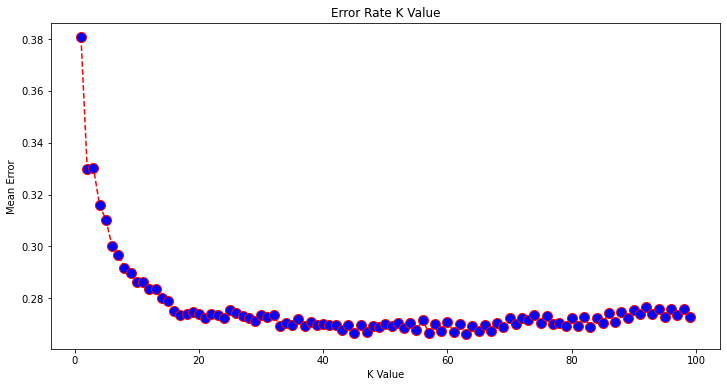

In [26]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [28]:
# create classification
knn = KNeighborsClassifier(metric = 'euclidean')

# create parameters
grid_params = {
    'n_neighbors': [1,5,9,13,17,21,25,29,33,37,41,45,49,53,61,65,69,73,77,81,85,89,93,97,101,105],
    'weights': ['uniform', 'distance'],
    'n_jobs': [-1]
}

# GridSearch
gs = GridSearchCV(knn, param_grid = grid_params, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

# Results of GridSearch
gs_results = gs.fit(X_train, Y_train)

In [29]:
gs_results.cv_results_

{'mean_fit_time': array([0.02207479, 0.15962205, 0.12047186, 0.10099573, 0.12137318,
        0.10128522, 0.10139828, 0.07952127, 0.25883474, 0.1581881 ,
        0.09970927, 0.1206562 , 0.08162374, 0.09973974, 0.00265026,
        0.00275865, 0.00252671, 0.01972852, 0.02170839, 0.0027813 ,
        0.00268092, 0.00292807, 0.00290103, 0.00249333, 0.00306549,
        0.00379047, 0.00303941, 0.10332303, 0.05276494, 0.00263162,
        0.02928033, 0.00357823, 0.00355196, 0.00358453, 0.00275202,
        0.00285921, 0.00352001, 0.0032712 , 0.00328531, 0.00277567,
        0.00290632, 0.00299244, 0.00256953, 0.00311136, 0.00255909,
        0.00273142, 0.00325637, 0.00320239, 0.0040381 , 0.00283151,
        0.00259213, 0.00258965]),
 'std_fit_time': array([3.69301363e-02, 7.73080602e-02, 1.13362789e-01, 1.07694244e-01,
        1.14609094e-01, 8.77591169e-02, 8.76030600e-02, 7.16893175e-02,
        2.77573291e-01, 9.96376701e-02, 8.67480627e-02, 9.54805655e-02,
        9.45002358e-02, 8.76038846e-0

In [30]:
gs_results.cv_results_['rank_test_accuracy']

array([51, 51, 25, 39, 24, 33,  9, 26, 19, 32, 11, 36, 15, 37, 13, 40,  6,
       34,  5, 30,  3, 29,  2, 30,  1, 28,  4, 27,  7, 35, 12, 38,  8, 42,
       10, 40, 20, 43, 17, 44, 21, 45, 16, 45, 18, 47, 14, 48, 22, 49, 23,
       50], dtype=int32)

In [31]:
# finds best model for accuracy
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_accuracy']) ]

{'n_jobs': -1, 'n_neighbors': 49, 'weights': 'uniform'}

In [32]:
# finds best model for roc auc
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_roc_auc_ovr']) ]

{'n_jobs': -1, 'n_neighbors': 105, 'weights': 'uniform'}

In [33]:
# finds best model for f1
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_f1_micro']) ]

{'n_jobs': -1, 'n_neighbors': 49, 'weights': 'uniform'}

In [34]:
# best accuracy model
acc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 49, weights = 'uniform')

# best roc auc model
roc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 105, weights = 'uniform')

# best f1 model
f1_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 49, weights = 'uniform')

In [35]:
# models the data
acc_model.fit(X_train, Y_train)
roc_model.fit(X_train, Y_train)
f1_model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs='-1', n_neighbors=49)

In [221]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y_n, train_size = 5000, random_state = 3)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4256 1055]
 [1364 1284]]
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78      5311
         1.0       0.55      0.48      0.51      2648

    accuracy                           0.70      7959
   macro avg       0.65      0.64      0.65      7959
weighted avg       0.69      0.70      0.69      7959



In [224]:
# create classification
knn = KNeighborsClassifier(metric = 'euclidean')

# create parameters
grid_params = {
    'n_neighbors': [1,5,9,13,17,21,25,29,33,37,41,45,49,53,61,65,69,73,77,81,85,89,93,97,101,105],
    'weights': ['uniform', 'distance'],
    'n_jobs': [-1]
}

# GridSearch
gs = GridSearchCV(knn, param_grid = grid_params, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

In [225]:
# Results of GridSearch
gs_results = gs.fit(X_train, Y_train)

In [226]:
gs_results.cv_results_

{'mean_fit_time': array([0.00266051, 0.00309782, 0.00262823, 0.00272694, 0.00271111,
        0.00272622, 0.00282655, 0.00317712, 0.00280409, 0.00279126,
        0.00282431, 0.00266633, 0.00295606, 0.00254083, 0.00312657,
        0.0027966 , 0.00272708, 0.00257721, 0.00299277, 0.0030489 ,
        0.00253339, 0.00367832, 0.00307913, 0.0027987 , 0.00314984,
        0.00278273, 0.00318661, 0.00345755, 0.00295453, 0.00286789,
        0.00275731, 0.00275254, 0.00276561, 0.00273228, 0.00276318,
        0.00268593, 0.00276766, 0.00355182, 0.00356011, 0.00278964,
        0.00280704, 0.00286217, 0.00280833, 0.00295238, 0.00282865,
        0.00265355, 0.00299473, 0.00318623, 0.00289197, 0.00261197,
        0.00274158, 0.00260882]),
 'std_fit_time': array([2.56635158e-04, 3.49553232e-04, 1.43958283e-04, 2.35963609e-04,
        1.90768859e-04, 1.00708933e-04, 1.13473378e-04, 5.45822300e-04,
        2.83043781e-04, 2.00099394e-04, 1.00522091e-04, 1.69813127e-04,
        3.02986420e-04, 1.74197888e-0

In [227]:
gs_results.cv_results_['rank_test_accuracy']

array([51, 51, 25, 45, 24, 36, 10, 26, 20, 40,  8, 38,  1, 28, 15, 35, 11,
       27,  6, 28,  2, 30,  3, 31,  7, 32, 11, 33,  5, 34,  4, 37,  9, 39,
       13, 41, 14, 42, 23, 47, 21, 49, 22, 48, 18, 43, 17, 46, 19, 44, 16,
       49], dtype=int32)

In [228]:
# finds best model for accuracy
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_accuracy']) ]

{'n_jobs': -1, 'n_neighbors': 25, 'weights': 'uniform'}

In [229]:
# finds best model for roc auc
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_roc_auc_ovr']) ]

{'n_jobs': -1, 'n_neighbors': 105, 'weights': 'uniform'}

In [230]:
# finds best model for f1
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_f1_micro']) ]

{'n_jobs': -1, 'n_neighbors': 25, 'weights': 'uniform'}

In [231]:
# best accuracy model
acc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 25, weights = 'uniform')

# best roc auc model
roc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 105, weights = 'uniform')

# best f1 model
f1_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 25, weights = 'uniform')

In [232]:
# models the data
acc_model.fit(X_train, Y_train)
roc_model.fit(X_train, Y_train)
f1_model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs='-1', n_neighbors=25)

In [233]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))

Text(0, 0.5, 'Mean Error')

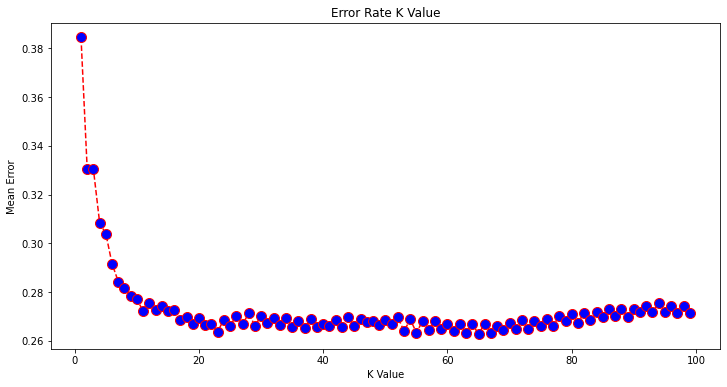

In [234]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [235]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y_n, train_size = 5000, random_state = 4)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4189 1082]
 [1365 1323]]
              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77      5271
         1.0       0.55      0.49      0.52      2688

    accuracy                           0.69      7959
   macro avg       0.65      0.64      0.65      7959
weighted avg       0.69      0.69      0.69      7959



In [236]:
# create classification
knn = KNeighborsClassifier(metric = 'euclidean')

# create parameters
grid_params = {
    'n_neighbors':[1,5,9,13,17,21,25,29,33,37,41,45,49,53,61,65,69,73,77,81,85,89,93,97,101,105],
    'weights':['uniform', 'distance'],
    'n_jobs': [-1]
}

gs = GridSearchCV(knn, param_grid = grid_params, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

In [237]:
gs_results = gs.fit(X_train, Y_train)

In [238]:
gs_results.cv_results_

{'mean_fit_time': array([0.00291004, 0.0025712 , 0.00277429, 0.002741  , 0.00308418,
        0.0026669 , 0.00273871, 0.00283318, 0.00277586, 0.00268455,
        0.00266867, 0.00282016, 0.00265923, 0.00276809, 0.00317717,
        0.00352025, 0.0026165 , 0.00260816, 0.00259662, 0.00308127,
        0.00282173, 0.00261078, 0.00259385, 0.00308499, 0.00309091,
        0.00287309, 0.00270538, 0.00293288, 0.00276785, 0.0027596 ,
        0.00267286, 0.00277739, 0.00272408, 0.00254531, 0.00289984,
        0.00288734, 0.0028069 , 0.00281277, 0.00279083, 0.00314093,
        0.00263181, 0.00319133, 0.00305076, 0.00281239, 0.00281386,
        0.00347137, 0.00273418, 0.00266976, 0.00329404, 0.00279613,
        0.00295873, 0.0026125 ]),
 'std_fit_time': array([2.89987396e-04, 9.99750937e-05, 4.08773487e-04, 1.04714526e-04,
        9.76828601e-04, 4.69124891e-05, 2.10467463e-04, 4.56868613e-04,
        2.90419721e-04, 2.20847293e-04, 1.51262292e-04, 2.39465921e-04,
        1.55910410e-04, 1.87982937e-0

In [239]:
gs_results.cv_results_['rank_test_accuracy']

array([51, 51, 25, 32, 21, 29, 12, 27,  2, 26,  3, 28, 10, 30, 16, 34,  1,
       30,  5, 32,  6, 35,  7, 36, 11, 40,  8, 38, 13, 41,  8, 37,  4, 39,
       14, 42, 15, 42, 17, 42, 19, 46, 17, 45, 20, 48, 21, 47, 23, 49, 24,
       50], dtype=int32)

In [240]:
# finds best model for accuracy
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_accuracy']) ]

{'n_jobs': -1, 'n_neighbors': 33, 'weights': 'uniform'}

In [241]:
# finds best model for roc auc
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_roc_auc_ovr']) ]

{'n_jobs': -1, 'n_neighbors': 101, 'weights': 'uniform'}

In [242]:
# finds best model for f1
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_f1_micro']) ]

{'n_jobs': -1, 'n_neighbors': 33, 'weights': 'uniform'}

In [243]:
# best accuracy model
acc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 33, weights = 'uniform')

# best roc auc model
roc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 101, weights = 'uniform')

# best f1 model
f1_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 33, weights = 'uniform')

In [244]:
# models the data
acc_model.fit(X_train, Y_train)
roc_model.fit(X_train, Y_train)
f1_model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs='-1', n_neighbors=33)

In [245]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))

Text(0, 0.5, 'Mean Error')

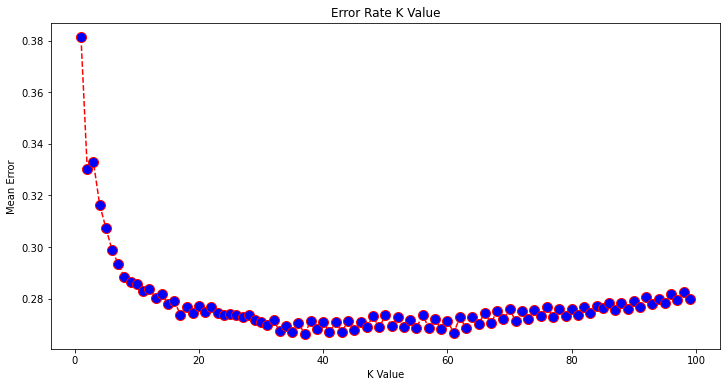

In [246]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [247]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y_n, train_size = 5000, random_state = 5)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4207 1126]
 [1285 1341]]
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78      5333
         1.0       0.54      0.51      0.53      2626

    accuracy                           0.70      7959
   macro avg       0.65      0.65      0.65      7959
weighted avg       0.69      0.70      0.69      7959



In [249]:
# create classification
knn = KNeighborsClassifier(metric = 'euclidean')

# create parameters
grid_params = {
    'n_neighbors':[1,5,9,13,17,21,25,29,33,37,41,45,49,53,61,65,69,73,77,81,85,89,93,97,101,105],
    'weights':['uniform', 'distance'],
    'n_jobs': [-1]
}

gs = GridSearchCV(knn, param_grid = grid_params, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

In [250]:
gs_results = gs.fit(X_train, Y_train)

In [251]:
gs_results.cv_results_

{'mean_fit_time': array([0.00272379, 0.00849977, 0.00276113, 0.00272431, 0.00294404,
        0.00266395, 0.00261669, 0.00293045, 0.00322504, 0.00264168,
        0.00284171, 0.00281801, 0.00263758, 0.00304031, 0.00320144,
        0.0026927 , 0.00277648, 0.00267038, 0.00271864, 0.00279784,
        0.00274663, 0.0028595 , 0.00255542, 0.00326171, 0.00288529,
        0.00268965, 0.00290465, 0.00282402, 0.00282307, 0.00272503,
        0.002671  , 0.00272827, 0.00286126, 0.00279655, 0.00299926,
        0.00265856, 0.00277596, 0.00281048, 0.00261374, 0.00333366,
        0.00282278, 0.0026906 , 0.00290041, 0.00288987, 0.00262046,
        0.00342188, 0.00303726, 0.00405493, 0.0027482 , 0.00291271,
        0.0027071 , 0.00263944]),
 'std_fit_time': array([3.83317632e-04, 1.08320569e-02, 1.28096691e-04, 1.08390299e-04,
        2.75296861e-04, 2.53354428e-04, 6.02512383e-05, 3.98847630e-04,
        5.73232709e-04, 3.85296138e-04, 1.95443214e-04, 5.31136357e-04,
        1.68883268e-04, 6.93833983e-0

In [252]:
gs_results.cv_results_['rank_test_accuracy']

array([51, 51, 25, 50, 24, 38, 23, 37, 12, 30, 11, 29, 10, 33,  5, 34,  7,
       36,  4, 30,  6, 32,  1, 26,  3, 28,  2, 26,  8, 35,  9, 39, 16, 40,
       12, 42, 22, 44, 14, 41, 15, 43, 17, 48, 20, 45, 18, 46, 21, 49, 18,
       47], dtype=int32)

In [253]:
# finds best model for accuracy
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_accuracy']) ]

{'n_jobs': -1, 'n_neighbors': 45, 'weights': 'uniform'}

In [254]:
# finds best model for roc auc
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_roc_auc_ovr']) ]

{'n_jobs': -1, 'n_neighbors': 65, 'weights': 'uniform'}

In [255]:
# finds best model for f1
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_f1_micro']) ]

{'n_jobs': -1, 'n_neighbors': 45, 'weights': 'uniform'}

In [256]:
# best accuracy model
acc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 45, weights = 'uniform')

# best roc auc model
roc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 65, weights = 'uniform')

# best f1 model
f1_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 45, weights = 'uniform')

In [257]:
# models the data
acc_model.fit(X_train, Y_train)
roc_model.fit(X_train, Y_train)
f1_model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs='-1', n_neighbors=45)

## Electrical Grid Stability Dataset

In [136]:
# loads electrical grid stability dataset
electrical_grid = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')

# One hot encoding categorical features
encoder = OneHotEncoder().fit(electrical_grid[['stabf']])
encoder.categories_

transformed = encoder.transform(electrical_grid[['stabf']] ).toarray() 

for index, category in enumerate( np.concatenate(encoder.categories_) ):
    electrical_grid[category] = transformed[:,index]

# moves columns so dataset looks better
cols = electrical_grid.columns.tolist()
cols = cols[-2:] + cols[:-2]
electrical_grid = electrical_grid[cols]

# drops string so grid search can work
electrical_grid = electrical_grid.drop(columns = ['stabf'])
    
electrical_grid

,stable,unstable,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,0.0,1.0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347
1,1.0,0.0,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957
2,0.0,1.0,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471
3,0.0,1.0,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871
4,0.0,1.0,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892
9996,1.0,0.0,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803
9997,1.0,0.0,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810
9998,0.0,1.0,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789


In [137]:
# Stores all columns except Stable in X and Stable in Y
X_e = electrical_grid.iloc[:, 1:]
Y_e = electrical_grid.iloc[:, 1]

# Gets 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_e, Y_e, train_size = 5000, random_state = 1)

In [138]:
# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

In [140]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[1819    0]
 [   0 3181]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1819
         1.0       1.00      1.00      1.00      3181

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [141]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))

Text(0, 0.5, 'Mean Error')

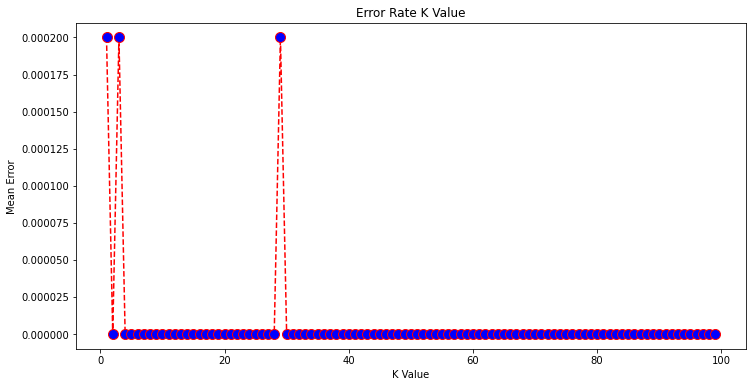

In [143]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [144]:
# create classification
knn = KNeighborsClassifier(metric = 'euclidean')

# create parameters
grid_params = {
    'n_neighbors':[1,5,9,13,17,21,25,29,33,37,41,45,49,53,61,65,69,73,77,81,85,89,93,97,101,105],
    'weights':['uniform', 'distance'],
    'n_jobs': [-1]
}

gs = GridSearchCV(knn, param_grid = grid_params, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

In [145]:
gs_results = gs.fit(X_train, Y_train)

In [146]:
gs_results.cv_results_

{'mean_fit_time': array([0.50162916, 0.16084957, 0.22012677, 0.55845323, 0.27880654,
        0.31942339, 0.33814893, 0.32260795, 0.31966825, 0.93708687,
        0.29920845, 0.34025574, 0.35908604, 0.45883541, 0.14490619,
        0.00657663, 0.0181705 , 0.00689764, 0.00810833, 0.0079248 ,
        0.00855165, 0.00701346, 0.00788403, 0.00702815, 0.00733676,
        0.0068573 , 0.00821805, 0.00711403, 0.00770855, 0.00805297,
        0.00667892, 0.00689545, 0.00720601, 0.00660539, 0.00825   ,
        0.00986423, 0.00735903, 0.00665097, 0.00684085, 0.0095922 ,
        0.01032896, 0.00726404, 0.00712953, 0.00698018, 0.00727048,
        0.01225371, 0.00660863, 0.00700936, 0.00679946, 0.00687046,
        0.0066824 , 0.00696397]),
 'std_fit_time': array([2.45398038e-01, 1.01290487e-01, 3.66732813e-02, 4.56215207e-01,
        7.24534200e-02, 2.97756368e-01, 7.77365799e-02, 1.92722122e-01,
        9.71950634e-02, 5.29880780e-01, 8.79551367e-02, 1.49284040e-01,
        1.60447828e-01, 1.85616971e-0

In [148]:
gs_results.cv_results_['rank_test_accuracy']

array([51, 51,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1], dtype=int32)

In [150]:
# finds best model for accuracy
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_accuracy']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [151]:
# finds best model for roc auc
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_roc_auc_ovr']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [152]:
# finds best model for f1
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_f1_micro']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [153]:
# best accuracy model
acc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

# best roc auc model
roc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

# best f1 model
f1_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

In [154]:
# models the data
acc_model.fit(X_train, Y_train)
roc_model.fit(X_train, Y_train)
f1_model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs='-1')

In [155]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_e, Y_e, train_size = 5000, random_state = 2)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[1806    0]
 [   0 3194]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1806
         1.0       1.00      1.00      1.00      3194

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [157]:
# create classification
knn = KNeighborsClassifier(metric = 'euclidean')

# create parameters
grid_params = {
    'n_neighbors':[1,5,9,13,17,21,25,29,33,37,41,45,49,53,61,65,69,73,77,81,85,89,93,97,101,105],
    'weights':['uniform', 'distance'],
    'n_jobs': [-1]
}

gs = GridSearchCV(knn, param_grid = grid_params, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

In [158]:
gs_results = gs.fit(X_train, Y_train)

In [160]:
gs_results.cv_results_

{'mean_fit_time': array([0.47841506, 0.34053249, 0.21953263, 0.40081682, 0.34166155,
        0.41772695, 0.31930237, 0.45902896, 0.51751709, 0.08416166,
        0.00602851, 0.0178812 , 0.00601363, 0.00586801, 0.00644145,
        0.00623417, 0.00679927, 0.00842528, 0.00673718, 0.00776949,
        0.00669293, 0.00621099, 0.00660863, 0.00635056, 0.00692582,
        0.00722461, 0.00641122, 0.00706482, 0.00720315, 0.00749512,
        0.00693917, 0.00771699, 0.00709701, 0.00727305, 0.00877647,
        0.00700068, 0.00638976, 0.00633955, 0.00621462, 0.00618796,
        0.00710177, 0.0083292 , 0.00705671, 0.00605068, 0.00765152,
        0.00636196, 0.00662804, 0.00988746, 0.0068037 , 0.00665073,
        0.00655017, 0.00650234]),
 'std_fit_time': array([1.72882821e-01, 1.02712827e-01, 1.17689740e-01, 1.55728143e-01,
        1.83685934e-01, 1.91518255e-01, 1.59021387e-01, 2.13267720e-01,
        1.45374787e-01, 9.51250522e-02, 3.14368132e-04, 1.38130391e-02,
        3.42073120e-04, 2.51409894e-0

In [161]:
gs_results.cv_results_['rank_test_accuracy']

array([51, 51,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1], dtype=int32)

In [162]:
# finds best model for accuracy
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_accuracy']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [163]:
# finds best model for roc auc
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_roc_auc_ovr']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [164]:
# finds best model for f1
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_f1_micro']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [165]:
# best accuracy model
acc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

# best roc auc model
roc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

# best f1 model
f1_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

In [166]:
# models the data
acc_model.fit(X_train, Y_train)
roc_model.fit(X_train, Y_train)
f1_model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs='-1')

In [167]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))

Text(0, 0.5, 'Mean Error')

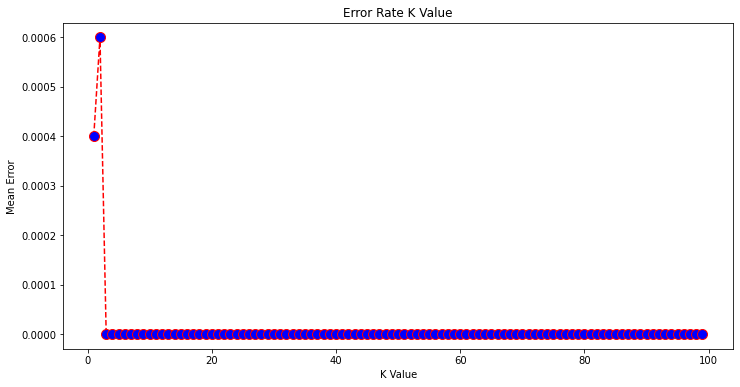

In [168]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [169]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_e, Y_e, train_size = 5000, random_state = 3)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[1797    0]
 [   0 3203]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1797
         1.0       1.00      1.00      1.00      3203

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [170]:
# create classification
knn = KNeighborsClassifier(metric = 'euclidean')

# create parameters
grid_params = {
    'n_neighbors':[1,5,9,13,17,21,25,29,33,37,41,45,49,53,61,65,69,73,77,81,85,89,93,97,101,105],
    'weights':['uniform', 'distance'],
    'n_jobs': [-1]
}

gs = GridSearchCV(knn, param_grid = grid_params, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

In [171]:
gs_results = gs.fit(X_train, Y_train)

In [172]:
gs_results.cv_results_

{'mean_fit_time': array([0.0066195 , 0.00661383, 0.00603399, 0.00730586, 0.00700088,
        0.00612922, 0.00766673, 0.00639744, 0.00658717, 0.00815816,
        0.00612679, 0.00810733, 0.00596728, 0.00577531, 0.0061779 ,
        0.0072279 , 0.00667591, 0.00652704, 0.00620389, 0.00754061,
        0.00805788, 0.00676651, 0.00749731, 0.00644088, 0.00700402,
        0.01374393, 0.00782571, 0.00677691, 0.00592794, 0.00795698,
        0.00746584, 0.00831995, 0.00604   , 0.00693016, 0.00860209,
        0.00588045, 0.00615721, 0.0067492 , 0.0074471 , 0.01038108,
        0.00861197, 0.00760889, 0.00654058, 0.00746741, 0.00680537,
        0.00826969, 0.00725679, 0.01049938, 0.00978456, 0.00750313,
        0.00665097, 0.01165833]),
 'std_fit_time': array([4.21143982e-04, 4.52159703e-04, 4.64562639e-04, 1.84288015e-03,
        1.56256012e-03, 2.03427383e-04, 2.03584214e-03, 3.09999989e-04,
        3.38930861e-04, 2.44886239e-03, 4.98988308e-04, 2.61221907e-03,
        5.94156320e-05, 1.45023388e-0

In [173]:
gs_results.cv_results_['rank_test_accuracy']

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [174]:
# finds best model for accuracy
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_accuracy']) ]

{'n_jobs': -1, 'n_neighbors': 1, 'weights': 'uniform'}

In [175]:
# finds best model for roc auc
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_roc_auc_ovr']) ]

{'n_jobs': -1, 'n_neighbors': 1, 'weights': 'uniform'}

In [176]:
# finds best model for f1
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_f1_micro']) ]

{'n_jobs': -1, 'n_neighbors': 1, 'weights': 'uniform'}

In [177]:
# best accuracy model
acc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 1, weights = 'uniform')

# best roc auc model
roc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 1, weights = 'uniform')

# best f1 model
f1_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 1, weights = 'uniform')

In [178]:
# models the data
acc_model.fit(X_train, Y_train)
roc_model.fit(X_train, Y_train)
f1_model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs='-1', n_neighbors=1)

In [179]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))

Text(0, 0.5, 'Mean Error')

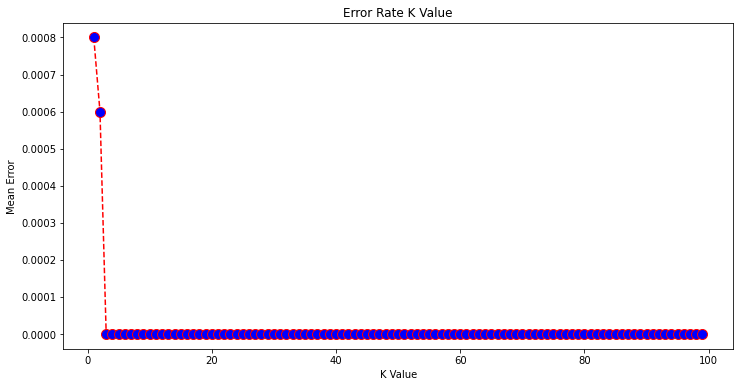

In [181]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [182]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_e, Y_e, train_size = 5000, random_state = 4)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[1799    1]
 [   0 3200]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1800
         1.0       1.00      1.00      1.00      3200

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [183]:
# create classification
knn = KNeighborsClassifier(metric = 'euclidean')

# create parameters
grid_params = {
    'n_neighbors':[1,5,9,13,17,21,25,29,33,37,41,45,49,53,61,65,69,73,77,81,85,89,93,97,101,105],
    'weights':['uniform', 'distance'],
    'n_jobs': [-1]
}

gs = GridSearchCV(knn, param_grid = grid_params, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

In [184]:
gs_results = gs.fit(X_train, Y_train)

In [185]:
gs_results.cv_results_

{'mean_fit_time': array([0.00578589, 0.00790944, 0.00703478, 0.00696931, 0.0059536 ,
        0.00962682, 0.00662899, 0.00898104, 0.00726838, 0.00651217,
        0.00852532, 0.00612297, 0.00654354, 0.00656238, 0.00584927,
        0.00607085, 0.00643492, 0.01014276, 0.00684032, 0.00570307,
        0.00615501, 0.00718017, 0.00759454, 0.00954399, 0.00648084,
        0.00622239, 0.00578713, 0.00812855, 0.00784159, 0.00612903,
        0.00625997, 0.00642056, 0.00609264, 0.00620279, 0.0062223 ,
        0.00621758, 0.0059833 , 0.00580688, 0.00596414, 0.0057765 ,
        0.00581951, 0.00692792, 0.00680065, 0.00600667, 0.00637021,
        0.00640726, 0.00629773, 0.00652609, 0.00737333, 0.00625343,
        0.00640163, 0.00743675]),
 'std_fit_time': array([1.73076676e-04, 2.61654114e-03, 2.63615575e-03, 1.82205602e-03,
        5.55305818e-04, 2.27523115e-03, 1.89238171e-03, 2.90676559e-03,
        1.98102744e-03, 1.91486045e-03, 3.09163426e-03, 4.84449952e-04,
        1.83680723e-03, 1.64973039e-0

In [186]:
gs_results.cv_results_['rank_test_accuracy']

array([51, 51,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1], dtype=int32)

In [187]:
# finds best model for accuracy
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_accuracy']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [188]:
# finds best model for roc auc
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_roc_auc_ovr']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [189]:
# finds best model for f1
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_f1_micro']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [190]:
# best accuracy model
acc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

# best roc auc model
roc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

# best f1 model
f1_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

In [191]:
# models the data
acc_model.fit(X_train, Y_train)
roc_model.fit(X_train, Y_train)
f1_model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs='-1')

In [192]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))

Text(0, 0.5, 'Mean Error')

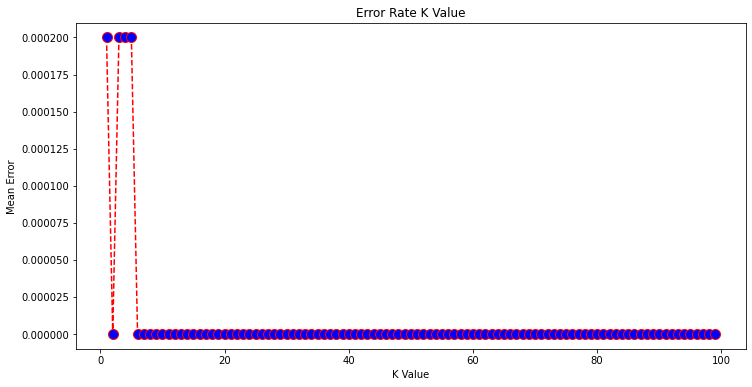

In [193]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [194]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_e, Y_e, train_size = 5000, random_state = 5)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[1793    0]
 [   0 3207]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1793
         1.0       1.00      1.00      1.00      3207

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [195]:
# create classification
knn = KNeighborsClassifier(metric = 'euclidean')

# create parameters
grid_params = {
    'n_neighbors':[1,5,9,13,17,21,25,29,33,37,41,45,49,53,61,65,69,73,77,81,85,89,93,97,101,105],
    'weights':['uniform', 'distance'],
    'n_jobs': [-1]
}

gs = GridSearchCV(knn, param_grid = grid_params, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

In [196]:
gs_results = gs.fit(X_train, Y_train)

In [197]:
gs_results.cv_results_

{'mean_fit_time': array([0.00805573, 0.00859618, 0.0071167 , 0.006319  , 0.00783997,
        0.00760293, 0.00701742, 0.00616407, 0.00561852, 0.00776114,
        0.005549  , 0.00564814, 0.00575681, 0.0055707 , 0.0057765 ,
        0.00577598, 0.00592432, 0.00616202, 0.00671172, 0.00646372,
        0.00611086, 0.00681009, 0.00676813, 0.00819283, 0.00652161,
        0.00588174, 0.00592179, 0.00696015, 0.00782647, 0.0092762 ,
        0.00634909, 0.00685315, 0.00690608, 0.00629272, 0.0068275 ,
        0.00767469, 0.00677438, 0.00650525, 0.006671  , 0.00638423,
        0.00657387, 0.0081501 , 0.00648818, 0.01026816, 0.00664854,
        0.0074789 , 0.00893807, 0.00901589, 0.00689087, 0.00714993,
        0.00728083, 0.00630684]),
 'std_fit_time': array([2.55264374e-03, 2.34122035e-03, 2.08830130e-03, 1.86260028e-04,
        2.07978356e-03, 2.14497357e-03, 2.12703398e-03, 4.64841274e-04,
        1.45865445e-04, 2.57837806e-03, 1.51085912e-05, 1.56008920e-04,
        1.65305792e-04, 3.61168816e-0

In [198]:
gs_results.cv_results_['rank_test_accuracy']

array([51, 51,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1], dtype=int32)

In [199]:
# finds best model for accuracy
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_accuracy']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [200]:
# finds best model for roc auc
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_roc_auc_ovr']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [201]:
# finds best model for f1
gs_results.cv_results_['params'][ np.argmin(gs_results.cv_results_['rank_test_f1_micro']) ]

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [202]:
# best accuracy model
acc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

# best roc auc model
roc_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

# best f1 model
f1_model = KNeighborsClassifier(n_jobs = '-1', n_neighbors = 5, weights = 'uniform')

In [203]:
# models the data
acc_model.fit(X_train, Y_train)
roc_model.fit(X_train, Y_train)
f1_model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs='-1')

In [204]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))

Text(0, 0.5, 'Mean Error')

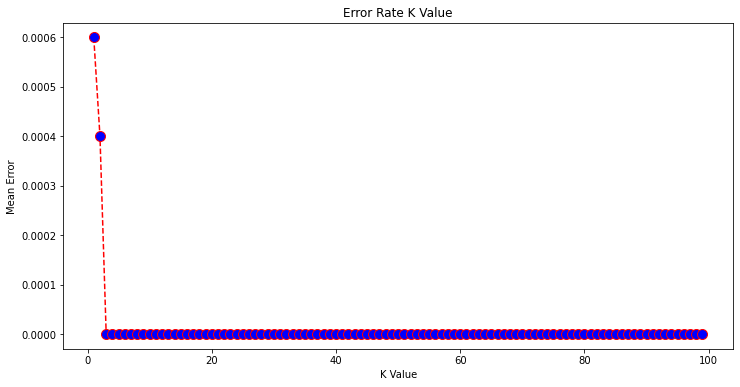

In [206]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Chess Dataset

In [261]:
chess = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king/krkopt.data')

# One hot encoding categorical features
encoder = OneHotEncoder().fit(chess[['draw']])
encoder.categories_

transformed = encoder.transform(chess[['draw']] ).toarray() 
transformed

for index, category in enumerate( np.concatenate(encoder.categories_) ):
    chess[category] = transformed[:,index]

# Drops strings and NaN so works in Grid Search
chess = chess.drop(columns = ['a', 'b', 'c'])
chess

,1,3,2,draw,eight,eleven,fifteen,five,four,fourteen,...,one,seven,six,sixteen,ten,thirteen,three,twelve,two,zero
0,1,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28050,1,7,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28051,1,7,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28052,1,7,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28053,1,7,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [262]:
# Stores all columns except draw in X and draw in Y
X_c = chess.drop(['draw'], axis=1)
Y_c = chess['draw']

In [263]:
# Gets 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_c, Y_c, train_size = 5000, random_state = 1)

In [264]:
# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [265]:
# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

In [266]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[20752     0]
 [    0  2303]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20752
         1.0       1.00      1.00      1.00      2303

    accuracy                           1.00     23055
   macro avg       1.00      1.00      1.00     23055
weighted avg       1.00      1.00      1.00     23055



In [267]:
# create classification
knn = KNeighborsClassifier(metric = 'euclidean')

# create parameters
grid_params = {
    'n_neighbors':[1,5,9,13,17,21,25,29,33,37,41,45,49,53,61,65,69,73,77,81,85,89,93,97,101,105],
    'weights':['uniform', 'distance'],
    'n_jobs': [-1]
}

gs = GridSearchCV(knn, param_grid = grid_params, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

In [95]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))

Text(0, 0.5, 'Mean Error')

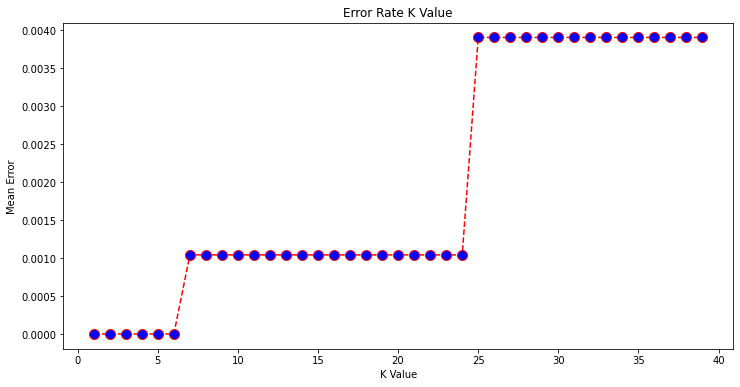

In [97]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,40), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [269]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_e, Y_e, train_size = 5000, random_state = 2)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[1806    0]
 [   0 3194]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1806
         1.0       1.00      1.00      1.00      3194

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [ ]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))
    
error

Text(0, 0.5, 'Mean Error')

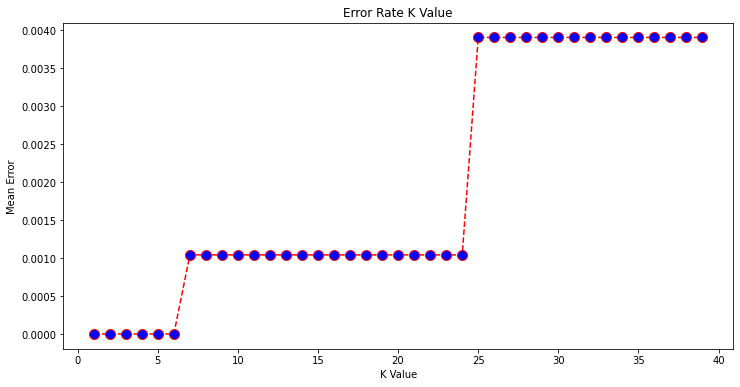

In [97]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [270]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_e, Y_e, train_size = 5000, random_state = 3)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[1797    0]
 [   0 3203]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1797
         1.0       1.00      1.00      1.00      3203

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [ ]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))
    
error

Text(0, 0.5, 'Mean Error')

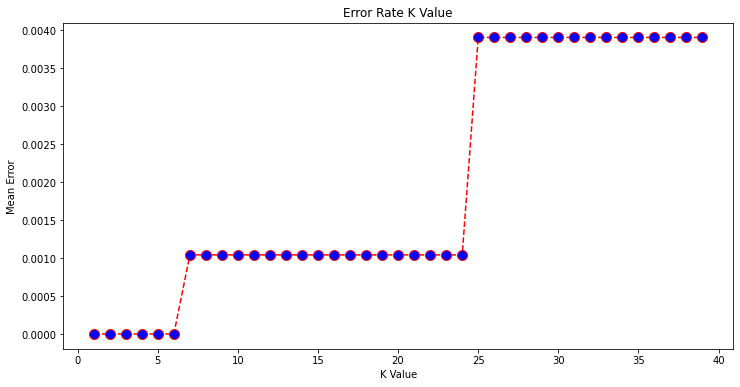

In [97]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [271]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_e, Y_e, train_size = 5000, random_state = 4)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[1799    1]
 [   0 3200]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1800
         1.0       1.00      1.00      1.00      3200

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [ ]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))
    
error

Text(0, 0.5, 'Mean Error')

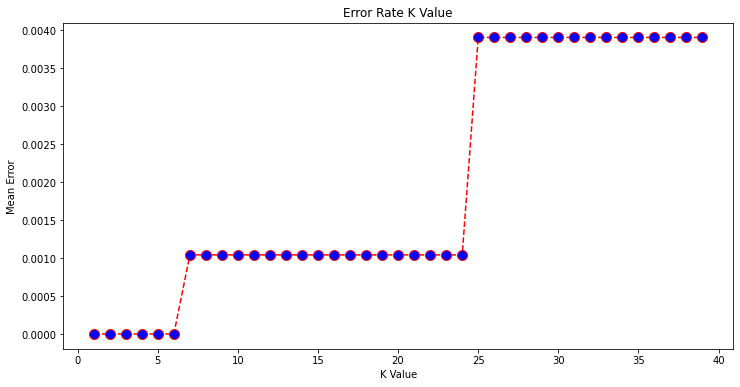

In [97]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [272]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_e, Y_e, train_size = 5000, random_state = 5)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = classifier.predict(X_test)

# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[1793    0]
 [   0 3207]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1793
         1.0       1.00      1.00      1.00      3207

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [ ]:
error = []

# Calculates mean of error for all predicted values in the range
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))
    
error

Text(0, 0.5, 'Mean Error')

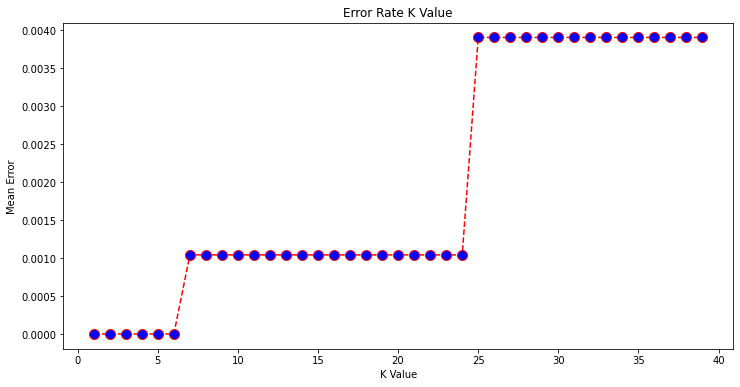

In [97]:
# Plot error values against K values
plt.figure(figsize = (12,6))
plt.plot(range(1,100), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')